# **Linear Regression**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Loading Dataset**

In [2]:
df = pd.read_csv("../Datasets/energy_efficiency.csv")

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [3]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Checking for duplicates**

In [4]:
df.duplicated().sum()

np.int64(0)

**Checking for missing values**

In [5]:
df.isna().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

The Dataset seems to be clean and no further cleaning is required before next step 

**Train/Test Split**

In [6]:
#Defining the dataset into X & Y 
#We have two targets therefore there will be two targets in Y and it will be multi-output model

X = df.drop(["heating_load", "cooling_load"], axis=1)
y = df[["heating_load", "cooling_load"]]

#split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


**Linear Regression Model**

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Error and performance metrics**

In [8]:
predictions = model.predict(X_test)

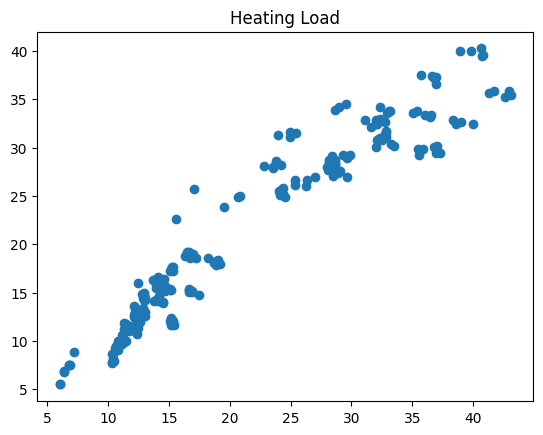

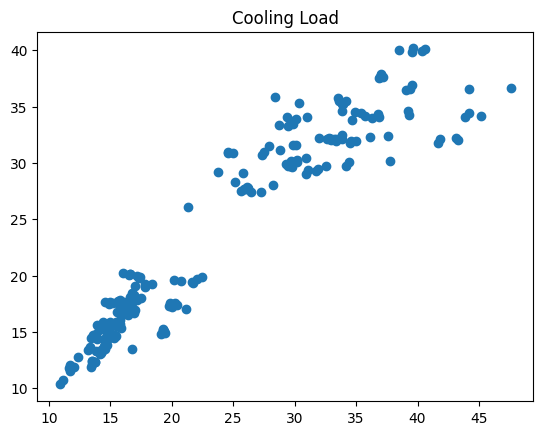

In [9]:
plt.scatter(y_test.iloc[:, 0], predictions[:, 0])
plt.title("Heating Load")
plt.show()

plt.scatter(y_test.iloc[:, 1], predictions[:, 1])
plt.title("Cooling Load")
plt.show()


The plots seems to be following a diagonal lines showing that model is relatively performing well
There are some clusters showing that there are some buildings in the dataset with distinct structures.

**Metrics**

In [10]:
#heating load metrics

# MAE - Mean average error
print("Heating Load Metrics:")
print("\nMAE")
print(round(metrics.mean_absolute_error(y_test.iloc[:, 0], predictions[:, 0]), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test.iloc[:, 0], predictions[:, 0]), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test.iloc[:, 0], predictions[:, 0])), 2))

# R-squared. 0 =bad  1 =good
print('\nR-squared:')
print(round(metrics.r2_score(y_test.iloc[:, 0], predictions[:, 0]), 2))

#Cooling load metrics

# MAE - Mean average error
print("\nCooling Load Metrics:")
print("\nMAE")
print(round(metrics.mean_absolute_error(y_test.iloc[:, 1], predictions[:, 1]), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test.iloc[:, 1], predictions[:, 1]), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test.iloc[:, 1], predictions[:, 1])), 2))

# R-squared. 0 =bad  1 =good
print('\nR-squared:')
print(round(metrics.r2_score(y_test.iloc[:, 1], predictions[:, 1]), 2))


Heating Load Metrics:

MAE
1.9

MSE
7.42

RMSE:
2.72

R-squared:
0.93

Cooling Load Metrics:

MAE
2.05

MSE
9.15

RMSE:
3.02

R-squared:
0.9


The metrics show us that the model is performing well MAE shows that the predictions are not that off and small gap between MAE and RMSE shows that there are no extreme outliers. R-squared shows that model is working good cooling load predictions are slightly lower but still good enough.

**Prediction Test with Sample Data**

In [12]:
sample = pd.DataFrame({
    'relative_compactness': [0.64],
    'surface_area': [784.0],
    'wall_area': [343.0],
    'roof_area': [220.5],
    'overall_height': [3.5],
    'orientation': [5.0],
    'glazing_area': [0.4],
    'glazing_area_distribution': [5.0]
})

prediction = model.predict(sample)

print(f"Heating Load: {prediction[0][0]:.2f}")
print(f"Cooling Load: {prediction[0][1]:.2f}")


Heating Load: 18.49
Cooling Load: 19.90
